# **Road Condition Classification and Defect Detection using CNN and VGG16**

This project aims to revolutionize road maintenance and safety. Utilizing Convolutional Neural Networks, it classifies road conditions—clean, dirty, or defective—like detects issues like potholes promptly. By offering real-time assessments, it enhances safety and enables timely maintenance, ensuring resilient and well-maintained road networks in urban areas.

The dataset comprises labeled images of road segments, including clean roads, dirty roads, and roads with defects like potholes.

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import os
from sklearn.metrics import classification_report, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input,Conv2D,MaxPool2D,Dense,Flatten
from keras.applications.vgg16 import VGG16

**Preparation of the dataset**

In [2]:
os.listdir('/content/drive/MyDrive/road_images/train')

['dirty', 'potholes', 'clean']

In [3]:
os.listdir('/content/drive/MyDrive/road_images/test')

['potholes', 'clean', 'dirty']

In [4]:
#preparation of training set

train_path='/content/drive/MyDrive/road_images/train'
X_train=[]
y_train=[]
categories=['dirty', 'potholes', 'clean']

for category in categories:
  path=os.path.join(train_path,category)
  images=os.listdir(path)
  for img in images:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1)) #normalization also happens
    X_train.append(img_resized)
    y_train.append(categories.index(category))
  print(category,'loaded')



dirty loaded
potholes loaded
clean loaded


In [5]:
#Preparation of tesing set

test_path='/content/drive/MyDrive/road_images/test'
X_test=[]
y_test=[]
categories=['potholes', 'clean', 'dirty']
for category in categories:
  path=os.path.join(test_path,category)
  images=os.listdir(path)
  #print images
  for img in images:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1)) #normalization also happens
    X_test.append(img_resized)
    y_test.append(categories.index(category))
  print(category,'loaded')

potholes loaded
clean loaded
dirty loaded


In [6]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 150, 150, 1), (340, 150, 150, 1), (614,), (340,))

# **CNN Model**

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),strides=2,activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(50,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
h=model.fit(X_train,y_train,epochs=20)

Epoch 1/20
20/20 [==============================] - 11s 28ms/step - loss: 1.0983 - accuracy: 0.3697
Epoch 2/20
20/20 [==============================] - 0s 16ms/step - loss: 1.0223 - accuracy: 0.4723
Epoch 3/20
20/20 [==============================] - 0s 16ms/step - loss: 0.9372 - accuracy: 0.5700
Epoch 4/20
20/20 [==============================] - 0s 16ms/step - loss: 0.8261 - accuracy: 0.6564
Epoch 5/20
20/20 [==============================] - 0s 16ms/step - loss: 0.7715 - accuracy: 0.6889
Epoch 6/20
20/20 [==============================] - 0s 16ms/step - loss: 0.6802 - accuracy: 0.7329
Epoch 7/20
20/20 [==============================] - 0s 16ms/step - loss: 0.6067 - accuracy: 0.7573
Epoch 8/20
20/20 [==============================] - 0s 16ms/step - loss: 0.5740 - accuracy: 0.7622
Epoch 9/20
20/20 [==============================] - 0s 16ms/step - loss: 0.4623 - accuracy: 0.8160
Epoch 10/20
20/20 [==============================] - 0s 16ms/step - loss: 0.3963 - accuracy: 0.8469
Epoch 11

**Model Evaluation**

In [11]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 17ms/step - loss: 8.2202 - accuracy: 0.0206


[8.22024917602539, 0.020588235929608345]

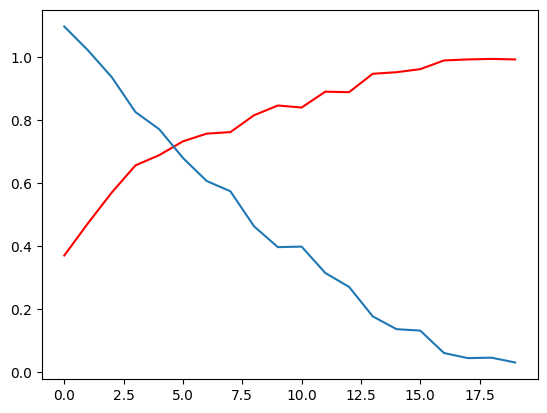

In [12]:
plt.plot(h.history['accuracy'],color='red',label='Accuracy')
plt.plot(h.history['loss'],label='Accuracy')

**New Prediction**

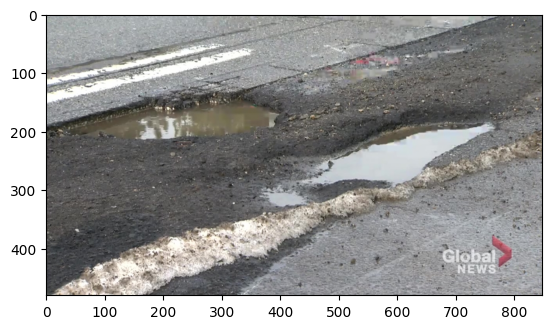

In [13]:
img=imread('/content/drive/MyDrive/road_images/test/potholes/100.jpg')
plt.imshow(img)

In [14]:
img=resize(img,(150,150,1))
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [15]:
X_train.shape

(614, 150, 150, 1)

New Prediction

In [16]:
y=model.predict(img)
y
ind=y.argmax()
ind


1/1 [==============================] - 0s 242ms/step


1

In [17]:
print(categories[ind])

clean


The accuracy is very low for test set.

# **Applying Transfer Learning**

Here I am using VGG16, a deep convolutional neural network architecture known for its effectiveness in image classification tasks.

Utilized the VGG16 architecture, which has been pre-trained on a large dataset (e.g., ImageNet), as the base model.

Fine-tuned the model by adding custom layers on top of VGG16 and trained it on  road dataset.

**VGG16**

In [18]:
IMAGE_SIZE=[224,224]

In [19]:
#reading the images using imagedatagenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          class_mode='categorical')

Found 614 images belonging to 3 classes.
Found 340 images belonging to 3 classes.


**Model Building**

In [20]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [21]:
for layer in vgg.layers:
  layer.trainable=False

In [22]:
x=Flatten()(vgg.output)
prediction=Dense(3,activation='softmax')(x)

In [23]:
from keras.models import Model
model1=Model(inputs=vgg.input,outputs=prediction)

In [24]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
r=model1.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=5)

<ipython-input-26-d69f4697d67b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model1.fit_generator(training_set,


Epoch 1/5
20/20 [==============================] - 31s 1s/step - loss: 0.8482 - accuracy: 0.6726 - val_loss: 0.2449 - val_accuracy: 0.9029
Epoch 2/5
20/20 [==============================] - 27s 1s/step - loss: 0.2013 - accuracy: 0.9267 - val_loss: 0.1231 - val_accuracy: 0.9618
Epoch 3/5
20/20 [==============================] - 23s 1s/step - loss: 0.1159 - accuracy: 0.9560 - val_loss: 0.0878 - val_accuracy: 0.9824
Epoch 4/5
20/20 [==============================] - 23s 1s/step - loss: 0.0876 - accuracy: 0.9707 - val_loss: 0.0745 - val_accuracy: 0.9882
Epoch 5/5
20/20 [==============================] - 24s 1s/step - loss: 0.0766 - accuracy: 0.9788 - val_loss: 0.0747 - val_accuracy: 0.9824


**Model Evaluation**

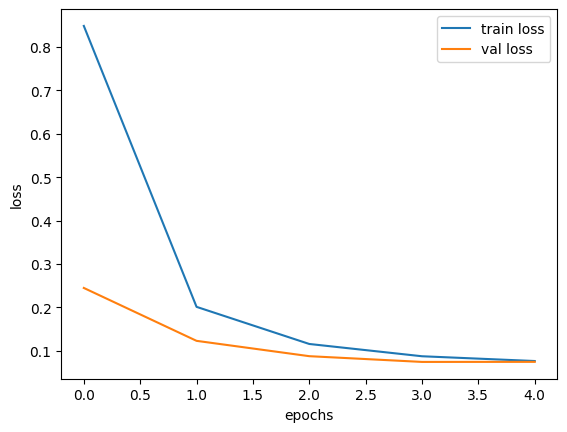

In [27]:
#loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

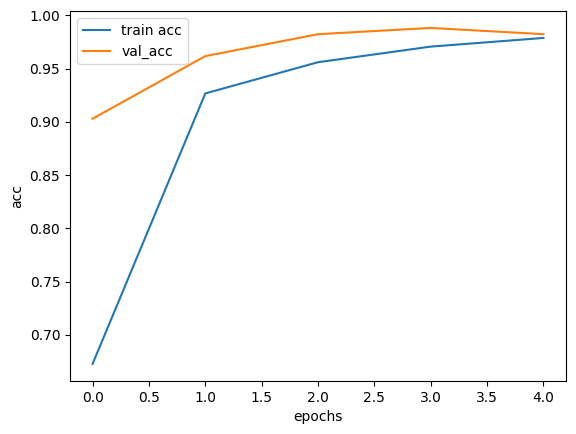

In [28]:
#accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

**New Prediction**

In [29]:
img_path='/content/drive/MyDrive/road_images/test/potholes/182.jpg'

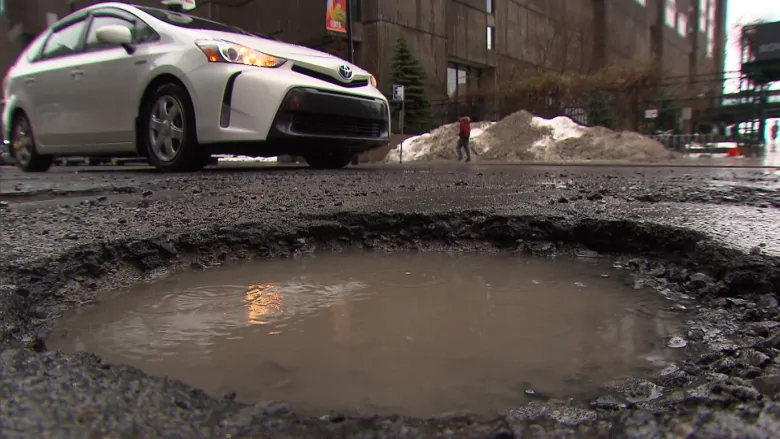

1/1 [==============================] - 1s 669ms/step
potholes


In [30]:
import cv2
from google.colab.patches import cv2_imshow
def predict_new(imgpath,model):
  image=cv2.imread(imgpath)
  cv2_imshow(image)
  image_resized=cv2.resize(image,(224,224))
  image=image_resized.reshape(1,224,224,3)
  pred=model.predict(image)
  x=np.argmax(pred)
  if x==0:
    print('clean')
  elif x==1:
    print('dirty')
  else:
    print('potholes')
predict_new(img_path,model1)

In conclusion, the implementation of the VGG16 model played a pivotal role in this project. By harnessing its capabilities, significantly improved the accuracy of road condition classification and defect detection. This system offers an efficient and precise solution for proactive road maintenance, elevating safety and infrastructure reliability.

Saving the Model

In [31]:
import pickle

In [32]:
#saving the trained model
filename='trained_model.h5'
pickle.dump(model1,open('trained_model.h5','wb'))

In [33]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.h5','rb'))